# World Bank data analysis of India and GBR

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
india_raw_data    = pd.read_csv('docs/API_IND_DS2_en_csv_v2_10400058.csv', skiprows=3)
gbr_raw_data      = pd.read_csv('docs/API_GBR_DS2_en_csv_v2_10402095.csv', skiprows=3)
india_metadata    = pd.read_csv('docs/Metadata_Indicator_API_GBR_DS2_en_csv_v2_10402095.csv', skiprows=0)
gbr_metadata      = pd.read_csv('docs/Metadata_Indicator_API_GBR_DS2_en_csv_v2_10402095.csv', skiprows=0)

In [0]:
years             = india_raw_data.columns[5:-1] # Valid columns for years
india_indicators  = india_raw_data['Indicator Name']
gbr_indicators    = gbr_raw_data['Indicator Name']

### User Inputs
To see all available indicators check the bottom of the notebook

In [0]:
keyword               = "high-technology exports"

lower_case_indicators = india_indicators.str.lower()
keyword_indicators    = india_indicators[lower_case_indicators.str.contains(keyword.lower(), regex=False)]
print("All Indicators matching keyword:\n\n", keyword_indicators, "\n")

desired_index       = int(input("Choose the desired index (number in left column above): "))
desired_indicator   = india_raw_data["Indicator Name"][desired_index]
print("\n Desired Indicator:\n", desired_indicator)


All Indicators matching keyword:

 10    High-technology exports (% of manufactured exp...
11                High-technology exports (current US$)
Name: Indicator Name, dtype: object 

Choose the desired index (number in left column above): 11

 Desired Indicator:
 High-technology exports (current US$)


Source:
 ['United Nations, Comtrade database through the WITS platform.'] 

Note:
 ['High-technology exports are products with high R&D intensity, such as in aerospace, computers, pharmaceuticals, scientific instruments, and electrical machinery. Data are in current U.S. dollars.']


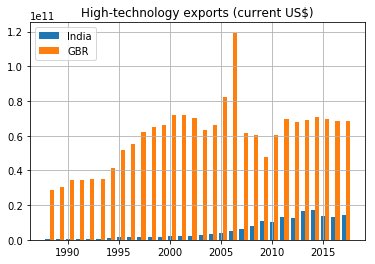

In [0]:
india_yearly_data   = [float(india_raw_data[year][desired_index]) for year in years]

gbr_desired_index   = gbr_indicators.str.contains(desired_indicator, regex=False)
gbr_yearly_data     = [float(gbr_raw_data[year][gbr_desired_index]) for year in years]

years_to_plot       = np.array([int(year) for year in years])
bar_width           = 0.4
plt.bar(years_to_plot, india_yearly_data, bar_width, label="India")
plt.bar(years_to_plot+bar_width, gbr_yearly_data, bar_width, label="GBR")
plt.title(desired_indicator)
plt.legend(loc="upper left")
plt.grid()

# Metadata
metadata_index      = india_metadata.INDICATOR_NAME.str.contains(desired_indicator, regex=False)
print("Source:\n", list(india_metadata["SOURCE_ORGANIZATION"][metadata_index]), "\n")
print("Note:\n", list(india_metadata["SOURCE_NOTE"][metadata_index]))

In [0]:
pd.options.display.max_rows = 2000
print(india_indicators)


0       Presence of peace keepers (number of troops, p...
1              Intentional homicides (per 100,000 people)
2          Intentional homicides, male (per 100,000 male)
3       Intentional homicides, female (per 100,000 fem...
4       Internally displaced persons, total displaced ...
5       Internally displaced persons, new displacement...
6       Internally displaced persons, new displacement...
7                Battle-related deaths (number of people)
8       Travel services (% of commercial service exports)
9       Transport services (% of commercial service ex...
10      High-technology exports (% of manufactured exp...
11                  High-technology exports (current US$)
12               Commercial service exports (current US$)
13      Computer, communications and other services (%...
14                        Export value index (2000 = 100)
15      Merchandise exports to low- and middle-income ...
16      Merchandise exports by the reporting economy (...
17      Mercha